In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Objective 1

1. Import/Open the Listings.csv file
2. Cast any date columns as a datetime format
3. Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
4. QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [2]:
listings_bnb = pd.read_csv(
    "D:/DA_NCI/PERSONAL_PROJECTS/Airbnb+Data/Airbnb Data/Listings.csv",
    encoding='ISO-8859-1',
    low_memory=False,
    parse_dates=['host_since']
)

In [3]:
listings_bnb.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
listings_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [5]:
paris_listings = listings_bnb.query("city == 'Paris'").loc[:, ["host_since", "city", "accommodates", "neighbourhood", "price"]]
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   city           64690 non-null  object        
 2   accommodates   64690 non-null  int64         
 3   neighbourhood  64690 non-null  object        
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [6]:
paris_listings.isnull().sum()

host_since       33
city              0
accommodates      0
neighbourhood     0
price             0
dtype: int64

In [7]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


# Objective 2

1. Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)
2. Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)
3. Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [8]:
paris_listings_neighbourhood = (paris_listings.groupby("neighbourhood").agg({"price" : "mean"}).sort_values("price"))
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [9]:
paris_listings_accomodates = (paris_listings.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price" : "mean"}).sort_values("price"))
paris_listings_accomodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [10]:
paris_listings_over_time = (paris_listings.set_index("host_since").resample("Y").agg({"price": "mean","accommodates" : "count"}))
paris_listings_over_time.head()

,price,accommodates
host_since,,
2008-12-31,77.750000,4
2009-12-31,159.641509,106
2010-12-31,125.031250,416
2011-12-31,124.828230,1339
2012-12-31,111.578615,4592


# Objective 3

1. Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed
2. Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed
3. Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed
4. Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?
5. Create a dual axis line chart to show both new hosts and average price over time

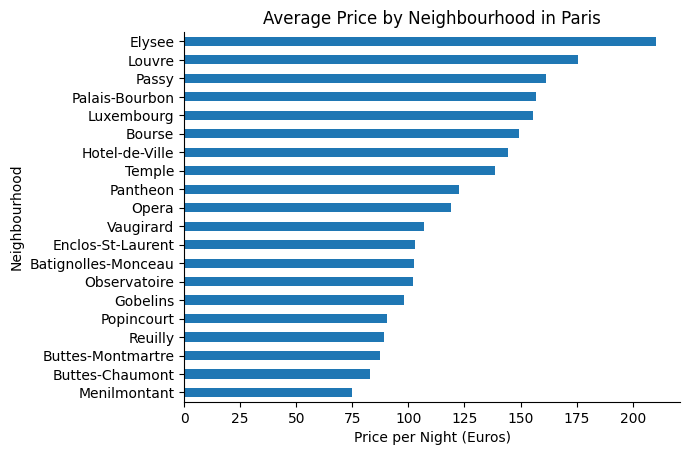

In [11]:
paris_listings_neighbourhood.plot.barh(title="Average Price by Neighbourhood in Paris",
                                       xlabel="Price per Night (Euros)",
                                       ylabel="Neighbourhood",
                                       legend=None)
sns.despine()

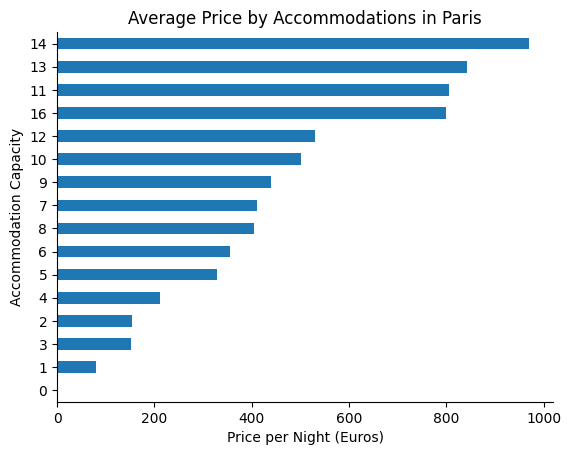

In [12]:
paris_listings_accomodates.plot.barh(title="Average Price by Accommodations in Paris",
                                    xlabel="Price per Night (Euros)",
                                    ylabel="Accommodation Capacity",
                                    legend=None)
sns.despine()

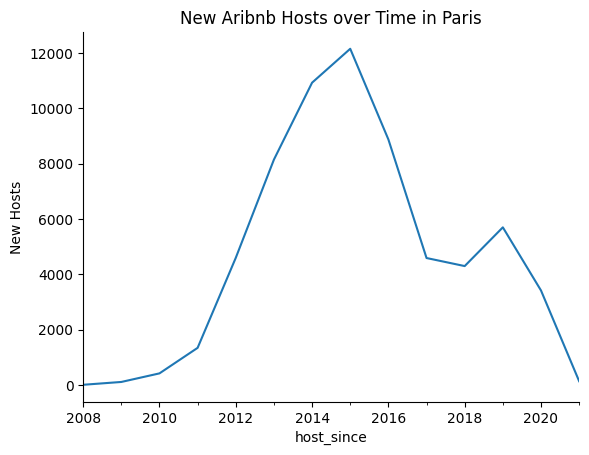

In [13]:
paris_listings_over_time["accommodates"].plot(title="New Aribnb Hosts over Time in Paris",
                                              ylabel="New Hosts")
sns.despine()

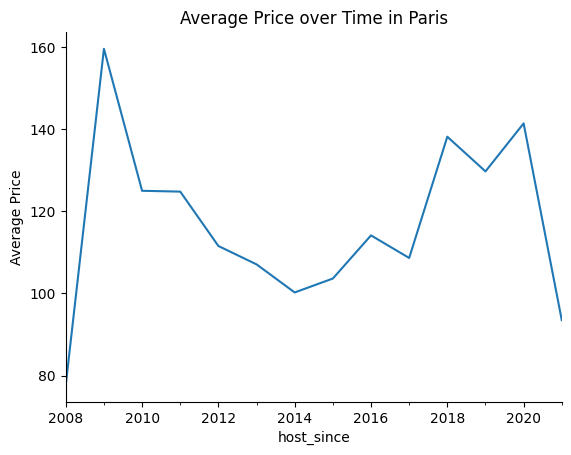

In [14]:
paris_listings_over_time["price"].plot(title="Average Price over Time in Paris",
                                              ylabel="Average Price")
sns.despine()

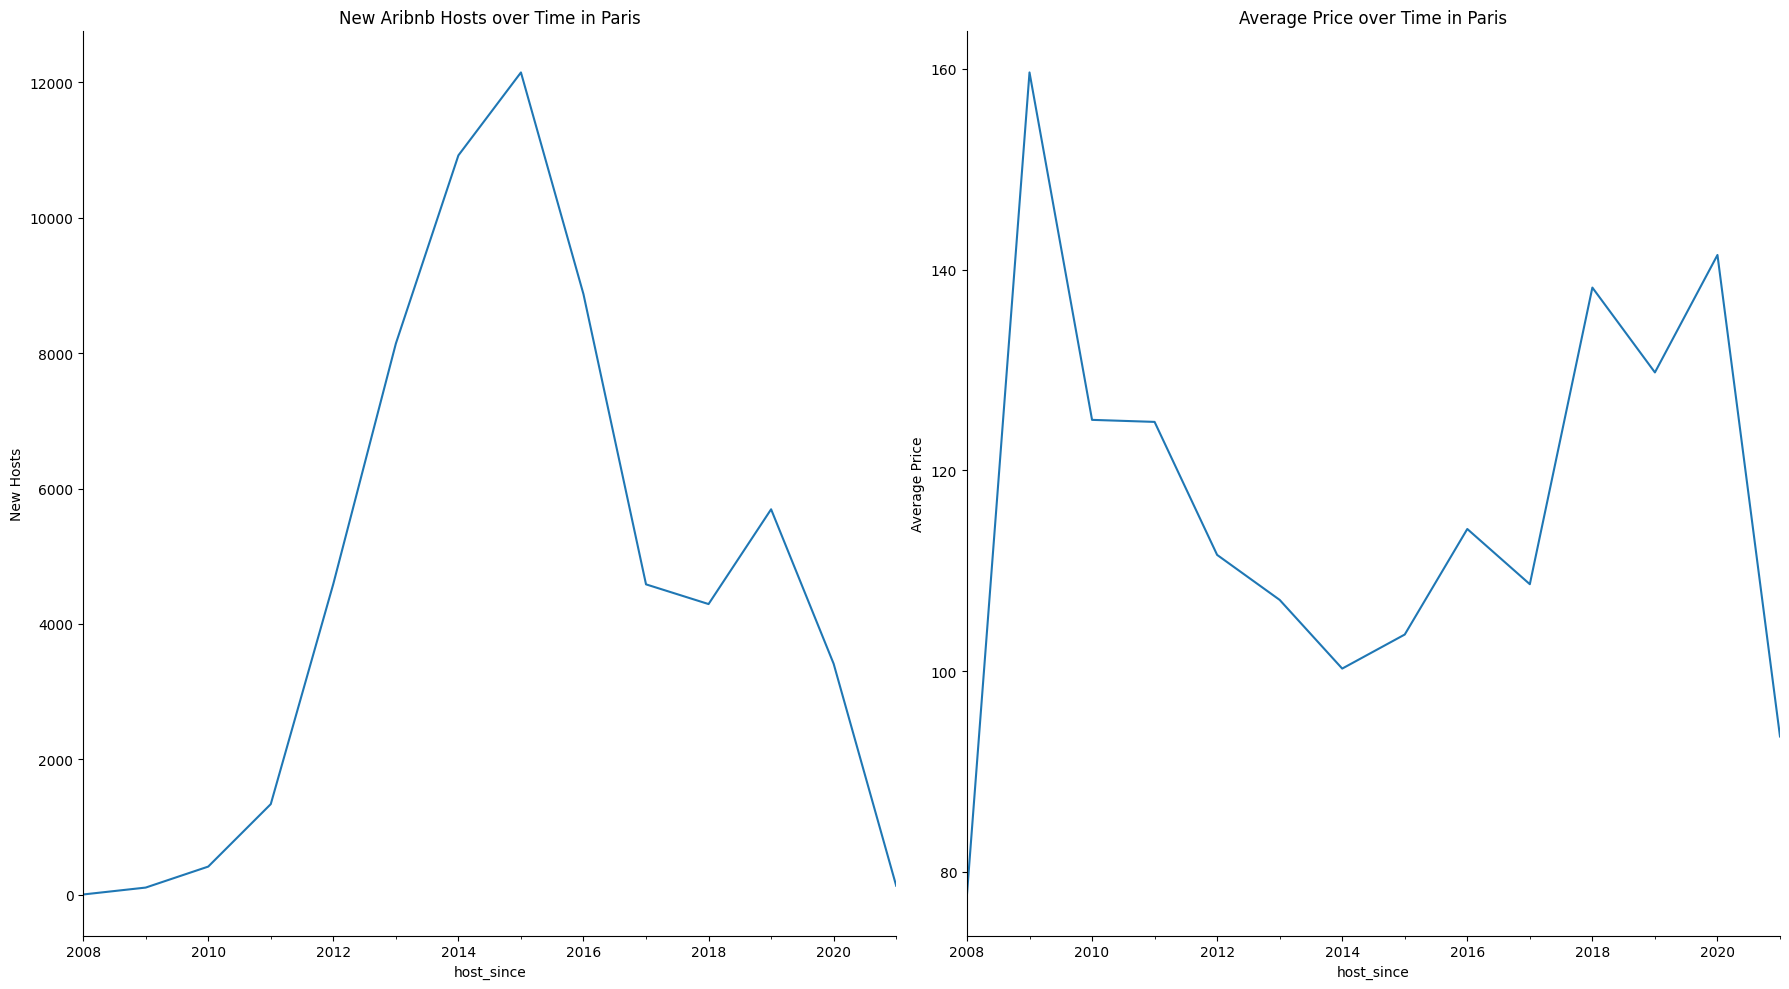

In [18]:
fig, axs = plt.subplots(1,2, figsize=(18,10))
paris_listings_over_time["accommodates"].plot(ax=axs[0],
                                              title="New Aribnb Hosts over Time in Paris",
                                              ylabel="New Hosts")
sns.despine(ax=axs[0])
paris_listings_over_time["price"].plot(ax=axs[1],
                                       title="Average Price over Time in Paris",
                                       ylabel="Average Price")
sns.despine(ax=axs[1])
plt.tight_layout()
plt.show()

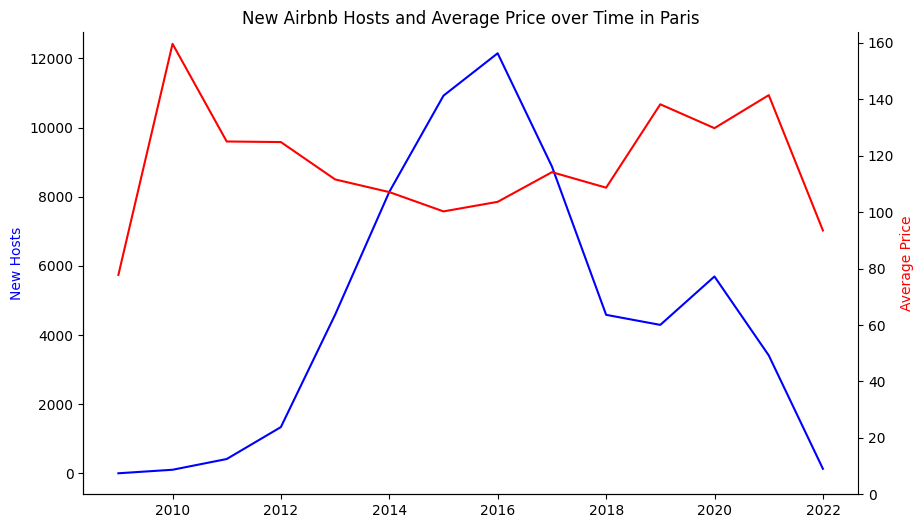

In [21]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(paris_listings_over_time.index,
         paris_listings_over_time["accommodates"],
         color='blue',
         label='New Hosts')
ax1.set_ylabel("New Hosts", color='blue')
ax1.set_title("New Airbnb Hosts and Average Price over Time in Paris")
sns.despine(ax=ax1)

ax2 = ax1.twinx()
ax2.plot(paris_listings_over_time.index,
         paris_listings_over_time["price"],
         color='red',
         label='Average Price')
ax2.set_ylabel("Average Price", color='red')
ax2.set_ylim(0)
sns.despine(ax=ax2, right=False)

plt.show()